<a href="https://colab.research.google.com/github/3702320501-dhanush/credit-card-/blob/main/AICT_CARDING_CREDIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Training data: 1.0
Accuracy of Testing data: 0.9903846153846154
[[98  0]
 [ 1  5]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        98
         1.0       1.00      0.83      0.91         6

    accuracy                           0.99       104
   macro avg       0.99      0.92      0.95       104
weighted avg       0.99      0.99      0.99       104

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       393
         1.0       1.00      1.00      1.00        20

    accuracy                           1.00       413
   macro avg       1.00      1.00      1.00       413
weighted avg       1.00      1.00      1.00       413



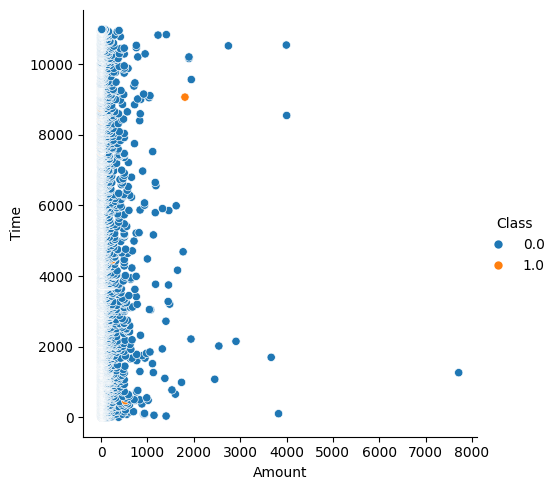

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report




credit_card_data = pd.read_csv('creditcard.csv.csv')




credit_card_data = pd.read_csv('creditcard.csv.csv')


credit_card_data.head(5)

credit_card_data.tail()


credit_card_data.info()

credit_card_data.isnull().sum()



credit_card_data['Class'].value_counts()


normal = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]



print(normal.shape)
print(fraud.shape)


normal.Amount.describe()

fraud.Amount.describe()

sns.relplot(x = 'Amount' , y = 'Time' , hue = 'Class', data = credit_card_data)



credit_card_data.groupby('Class').mean()


normal_sample = normal.sample(n=492)


credit_card_new_data = pd.concat([normal_sample, fraud], axis=0)


credit_card_new_data

credit_card_new_data['Class'].value_counts()


X = credit_card_new_data.drop('Class', axis=1)
Y = credit_card_new_data['Class']


X


Y



X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state= 2)

print(X.shape, X_train.shape,  X_test.shape)

model = LogisticRegression()

model.fit(X_train,Y_train)


X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)

print('Accuracy of Training data:', training_data_accuracy)


X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

print('Accuracy of Testing data:', test_data_accuracy)

print(confusion_matrix(X_test_pred, Y_test))
print(classification_report(X_test_pred, Y_test))
print(classification_report(X_train_pred, Y_train))